# **Mapas**
----

In [61]:
# Con este código elegimos el archivo o los archivos del escritorio que deseamos abrir

from google.colab import files
uploaded = files.upload()

# Importamos pandas para analizar datos
import pandas as pd

Saving languages_and_dialects.csv to languages_and_dialects (1).csv


In [62]:
# Lee el archivo CSV (asegúrate de que el nombre del archivo sea correcto)
datos_lin = pd.read_csv('languages_and_dialects.csv')

# Visualizamos la tabla original
datos_lin

,glottocode,name,isocodes,level,macroarea,latitude,longitude
0,3adt1234,3Ad-Tekles,NaN,dialect,Africa,NaN,NaN
1,aala1237,Aalawa,NaN,dialect,Papunesia,NaN,NaN
2,aant1238,Aantantara,NaN,dialect,Papunesia,NaN,NaN
3,aari1239,Aari,aiw,language,Africa,5.95034,36.5721
4,aari1240,Aariya,aay,language,Eurasia,NaN,NaN
...,...,...,...,...,...,...,...
22106,zuwa1238,Zuwadza,NaN,dialect,Papunesia,NaN,NaN
22107,zwal1238,Zwall,NaN,dialect,Africa,NaN,NaN
22108,zyph1238,Zyphe,zyp,language,Eurasia,22.52400,93.2640
22109,zyud1238,Zyuzdin,NaN,dialect,Eurasia,NaN,NaN


In [64]:
# ¿Cuál son las macroáreas únicas?
macroarea = datos_lin['macroarea'].unique()

macroarea

array(['Africa', 'Papunesia', 'Eurasia', 'South America', 'North America',
       'Australia', nan], dtype=object)

In [65]:
# Eliminamos las filas con datos vacíos (NaN)
datos_depurados = datos_lin.dropna()

datos_depurados

,glottocode,name,isocodes,level,macroarea,latitude,longitude
3,aari1239,Aari,aiw,language,Africa,5.95034,36.57210
5,aasa1238,Aasax,aas,language,Africa,-4.00679,36.86480
11,abad1241,Abadi,kbt,language,Papunesia,-9.03389,146.99200
13,abag1245,Abaga,abg,language,Papunesia,-6.12028,145.66500
15,abai1240,Abai Sungai,abf,language,Papunesia,5.55394,118.30600
...,...,...,...,...,...,...,...
22092,zuma1239,Zumaya,zuy,language,Africa,10.55798,14.44451
22094,zumb1240,Zumbun,jmb,language,Africa,10.82700,9.96830
22099,zuni1245,Zuni,zun,language,North America,35.00560,-108.78200
22100,zuoj1238,Zuojiang Zhuang,zzj,language,Eurasia,22.40000,106.90000


`value_counts()` es una función en pandas que se utiliza para contar la frecuencia de valores únicos en una serie de datos. Es particularmente útil para obtener una visión general rápida de la distribución de valores en una columna de un DataFrame.

In [66]:
# Calcula el número de lenguas por cada macroárea
conteo_por_macroarea = datos_depurados['macroarea'].value_counts()

# Muestra el resultado
print(conteo_por_macroarea)

macroarea
Africa           2255
Papunesia        2152
Eurasia          1827
North America     688
South America     547
Australia         378
Name: count, dtype: int64


In [67]:
# ¿Qué tipo de dato nos devuelve .values_counts() cuándo calculamos desde los datos de una columna?
type(conteo_por_macroarea)

pandas.core.series.Series

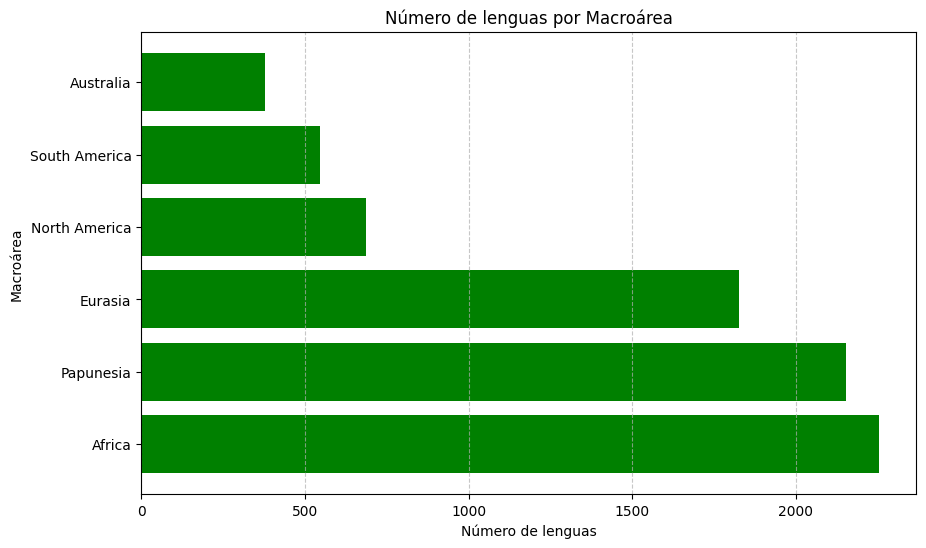

In [68]:
import matplotlib.pyplot as plt

# Contar el número de lenguas por macroarea
lenguas = datos_depurados['macroarea'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
lenguas.columns = ['macroarea', 'número de lenguas']

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(lenguas['macroarea'], lenguas['número de lenguas'], color='green')

# Añade etiquetas a los ejes
plt.xlabel('Número de lenguas')
plt.ylabel('Macroárea')

# Añade título al gráfico
plt.title('Número de lenguas por Macroárea')

# Añade una cuadrícula en el eje x
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Guarda el gráfico en un archivo
plt.savefig('barras_horizontales_macroarea.png', format='png', dpi=300, bbox_inches='tight')

# Muestra el gráfico
plt.show()

In [69]:
# Visualizamos los datos usados en la tabla
lenguas

,macroarea,número de lenguas
0,Africa,2255
1,Papunesia,2152
2,Eurasia,1827
3,North America,688
4,South America,547
5,Australia,378


-----
La función `tolist()` es un método en pandas que se utiliza para convertir una serie o una columna de un DataFrame en una lista de Python. Este método es útil cuando necesitas trabajar con los datos de pandas fuera del marco de datos, ya que te permite manipularlos utilizando las operaciones y funciones de listas nativas de Python.

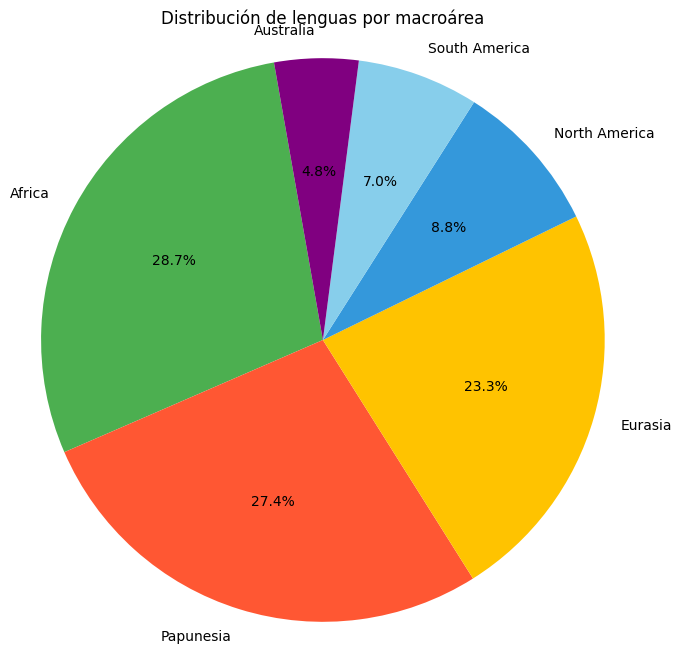

In [71]:
# Datos para el gráfico de pastel
labels = lenguas['macroarea'].tolist()
sizes = lenguas['número de lenguas'].tolist()
colors = ['#4CAF50', '#FF5733', '#FFC300', '#3498DB', 'skyblue', 'purple']  # Se añadieron más colores para cada macroárea


# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=100)
plt.title('Distribución de lenguas por macroárea')
plt.axis('equal')  # Asegura que el gráfico de pastel se dibuje como un círculo perfecto

# Guardar el gráfico
plt.savefig('pastel_lenguas.png', dpi=300)

# Mostrar el gráfico
plt.show()

In [72]:
# Filtra los datos por una macroárea específica
macroarea_especifica = 'Africa'  # Reemplaza 'Africa' por la macroárea que deseas filtrar
datos_africa = datos_depurados[datos_depurados['macroarea'] == macroarea_especifica]

# Muestra los datos filtrados
datos_africa

,glottocode,name,isocodes,level,macroarea,latitude,longitude
3,aari1239,Aari,aiw,language,Africa,5.95034,36.57210
5,aasa1238,Aasax,aas,language,Africa,-4.00679,36.86480
23,aban1242,Abanyom,abm,language,Africa,6.30619,8.63055
33,abee1242,Abé,aba,language,Africa,5.59682,-4.38497
41,abid1235,Abidji,abi,language,Africa,5.65656,-4.58421
...,...,...,...,...,...,...,...
22087,zula1235,Zula,zla,language,Africa,-4.58400,26.74000
22090,zulg1242,Zulgo-Gemzek,gnd,language,Africa,10.82700,14.05780
22091,zulu1248,Zulu,zul,language,Africa,-28.90000,30.20000
22092,zuma1239,Zumaya,zuy,language,Africa,10.55798,14.44451


In [73]:
# Elimina las filas con datos vacíos
#datos_africa_depurado = datos_africa.dropna()

# Muestra los datos filtrados
#datos_africa_depurado

## **Geopandas**: Es una librería de Python que extiende las capacidades de pandas para permitir el trabajo con datos geoespaciales. Combina la simplicidad de pandas con las potentes herramientas de análisis geoespacial. Esto permite a los usuarios manipular datos espaciales y realizar análisis geoespaciales con facilidad.

In [74]:
### Instalamos librerías que permitan visualizar mapas

import geopandas as gpd

In [75]:
# dir() nos permite saber los atributos y funciones ligadas a geopandas
dir(gpd)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_decorator',
 '_vectorized',
 '_version',
 'array',
 'base',
 'clip',
 'datasets',
 'explore',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_feather',
 'read_file',
 'read_parquet',
 'read_postgis',
 'show_versions',
 'sindex',
 'sjoin',
 'sjoin_nearest',
 'tools']

`shapely.geometry.Point`: Importa la clase Point de la librería shapely, que se utiliza para crear objetos geométricos de puntos.

`zip(datos_africa_depurado['longitude'], datos_africa_depurado['latitude'])`: Combina las columnas de longitud y latitud en pares (x, y).

`Point(xy)`: Crea un objeto Point para cada par de coordenadas (longitud, latitud).

`geometry`: Una lista de objetos Point que representan las ubicaciones geográficas de los datos.

`gpd.GeoDataFrame`: Crea un GeoDataFrame a partir de un DataFrame de pandas.

`gpd.points_from_xy`: Método de GeoPandas que crea una serie de objetos Point directamente a partir de las columnas de longitud y latitud del DataFrame.

`geometry=gpd.points_from_xy(datos_africa_depurado.longitude, datos_africa_depurado.latitude)`: Crea y establece la columna de geometría usando points_from_xy de GeoPandas.

In [76]:
from shapely.geometry import Point
# Creamos una columna 'geometry' con objetos Point a partir de las columnas de latitud y longitud
geometry = [Point(xy) for xy in zip(datos_africa['longitude'], datos_africa['latitude'])]

# Crea un GeoDataFrame a partir de los datos depurados y establece la columna de geometría
gdf = gpd.GeoDataFrame(datos_africa, geometry=gpd.points_from_xy(datos_africa.longitude, datos_africa.latitude))

---
`gpd.read_file()`: Esta función de GeoPandas se utiliza para leer archivos geoespaciales y cargar los datos en un GeoDataFrame.

`gpd.datasets.get_path('naturalearth_lowres')`: Esta función obtiene la ruta del archivo de un conjunto de datos de ejemplo incluido con GeoPandas. En este caso, el conjunto de datos es 'naturalearth_lowres', que contiene datos geoespaciales a baja resolución del mundo, provenientes de Natural Earth.



---
`world['continent']=='Africa'`: Esto crea una Serie booleana que contiene True para las filas donde el valor en la columna 'continent' es igual a 'Africa' y False en caso contrario.

`world[...]`: Utiliza esta Serie booleana para filtrar las filas del GeoDataFrame world, conservando solo aquellas para las cuales la condición es verdadera.

---

In [78]:
# Plotea el mapa base
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<ipython-input-78-6ddf772f9d96>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [79]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [80]:
world = world[(world['continent']=='Africa')]

In [81]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."
14,42813238.0,Africa,Sudan,SDN,30513,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ..."
15,15946876.0,Africa,Chad,TCD,11314,"POLYGON ((23.83766 19.58047, 23.88689 15.61084..."
25,58558270.0,Africa,South Africa,ZAF,351431,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
26,2125268.0,Africa,Lesotho,LSO,2376,"POLYGON ((28.97826 -28.95560, 29.32517 -29.257..."
48,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


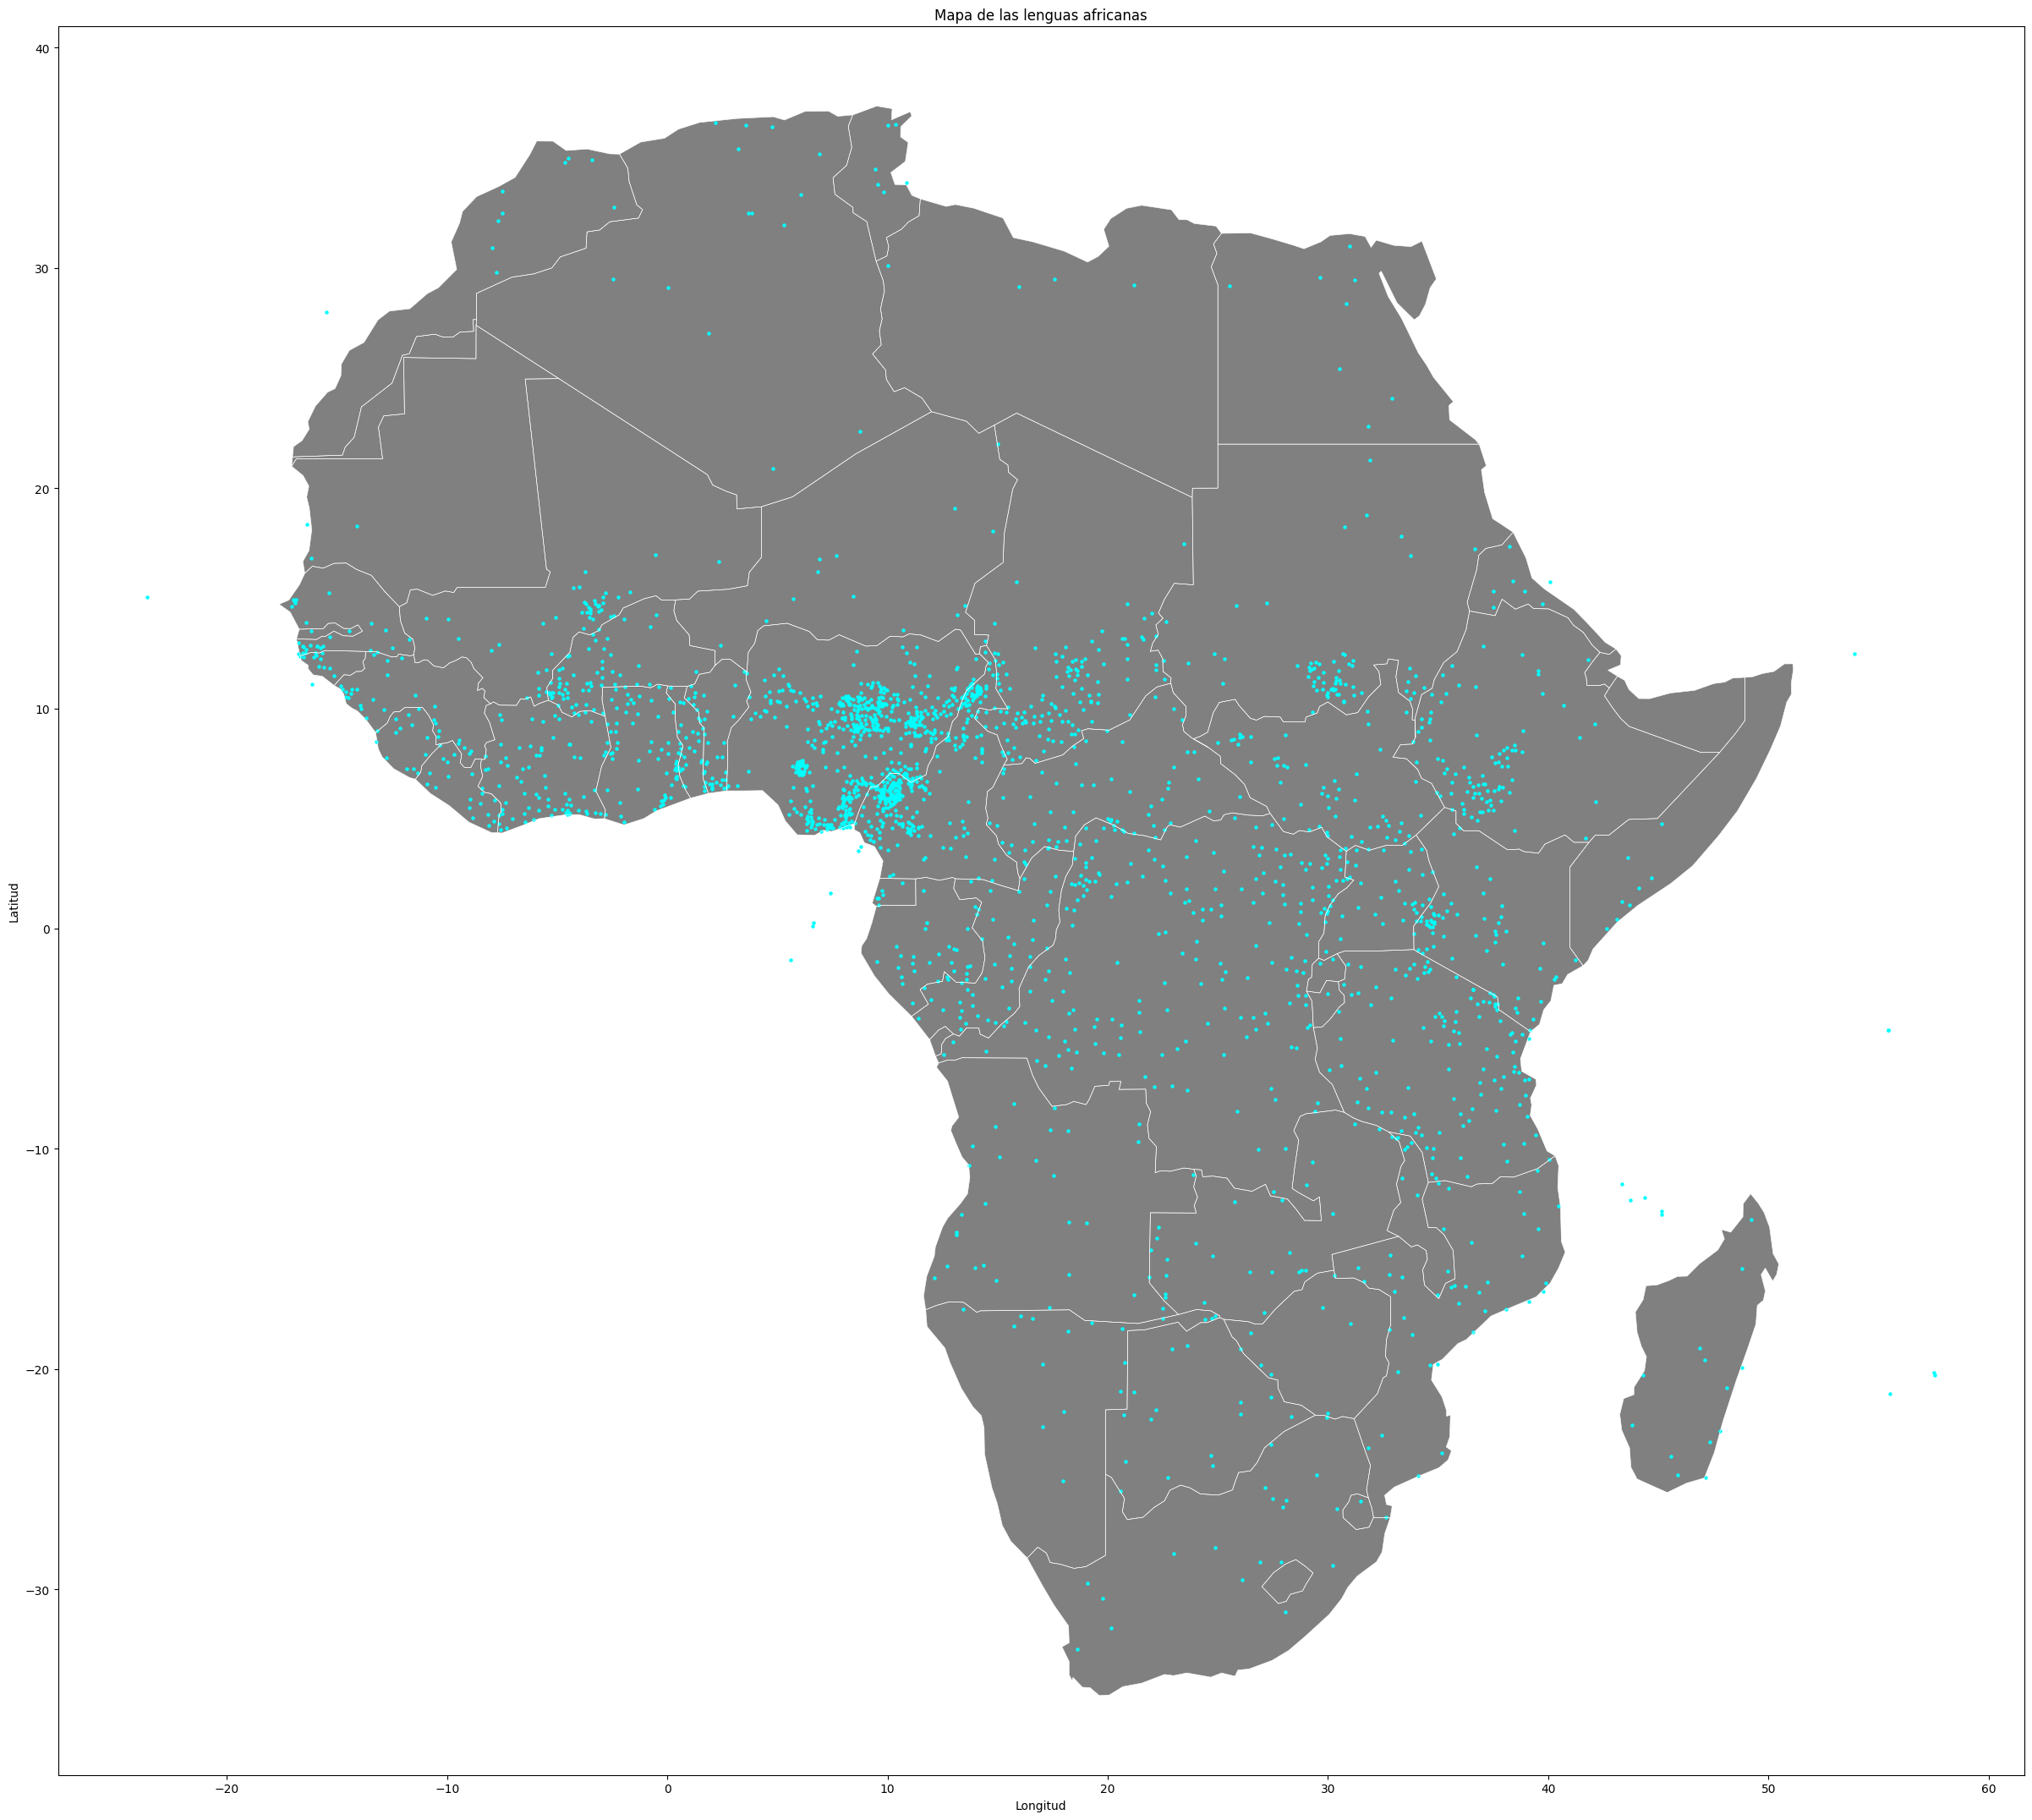

In [84]:
# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(figsize=(30, 30))

# Plotea el mapa base
world.plot(ax=ax, color='grey')

# Plotea las líneas de las fronteras del mundo
world.boundary.plot(ax=ax, color='white', linewidth=0.40)

# Plotea tus datos encima del mapa base
gdf.plot(ax=ax, color='aqua', marker='o', markersize=5, alpha=1)

# Añade etiquetas para cada punto basado en la columna 'Glottocode'
#for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['isocodes']):
#    ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")


# Añadir una leyenda
ax.set_title('Mapa de las lenguas africanas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Guardar el mapa
plt.savefig('mapa_ejemplo.jpg', format='jpg', transparent=True, bbox_inches='tight', dpi=300)

# Mostrar el mapa
plt.show()

<ipython-input-85-ce9969cb0400>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_b = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


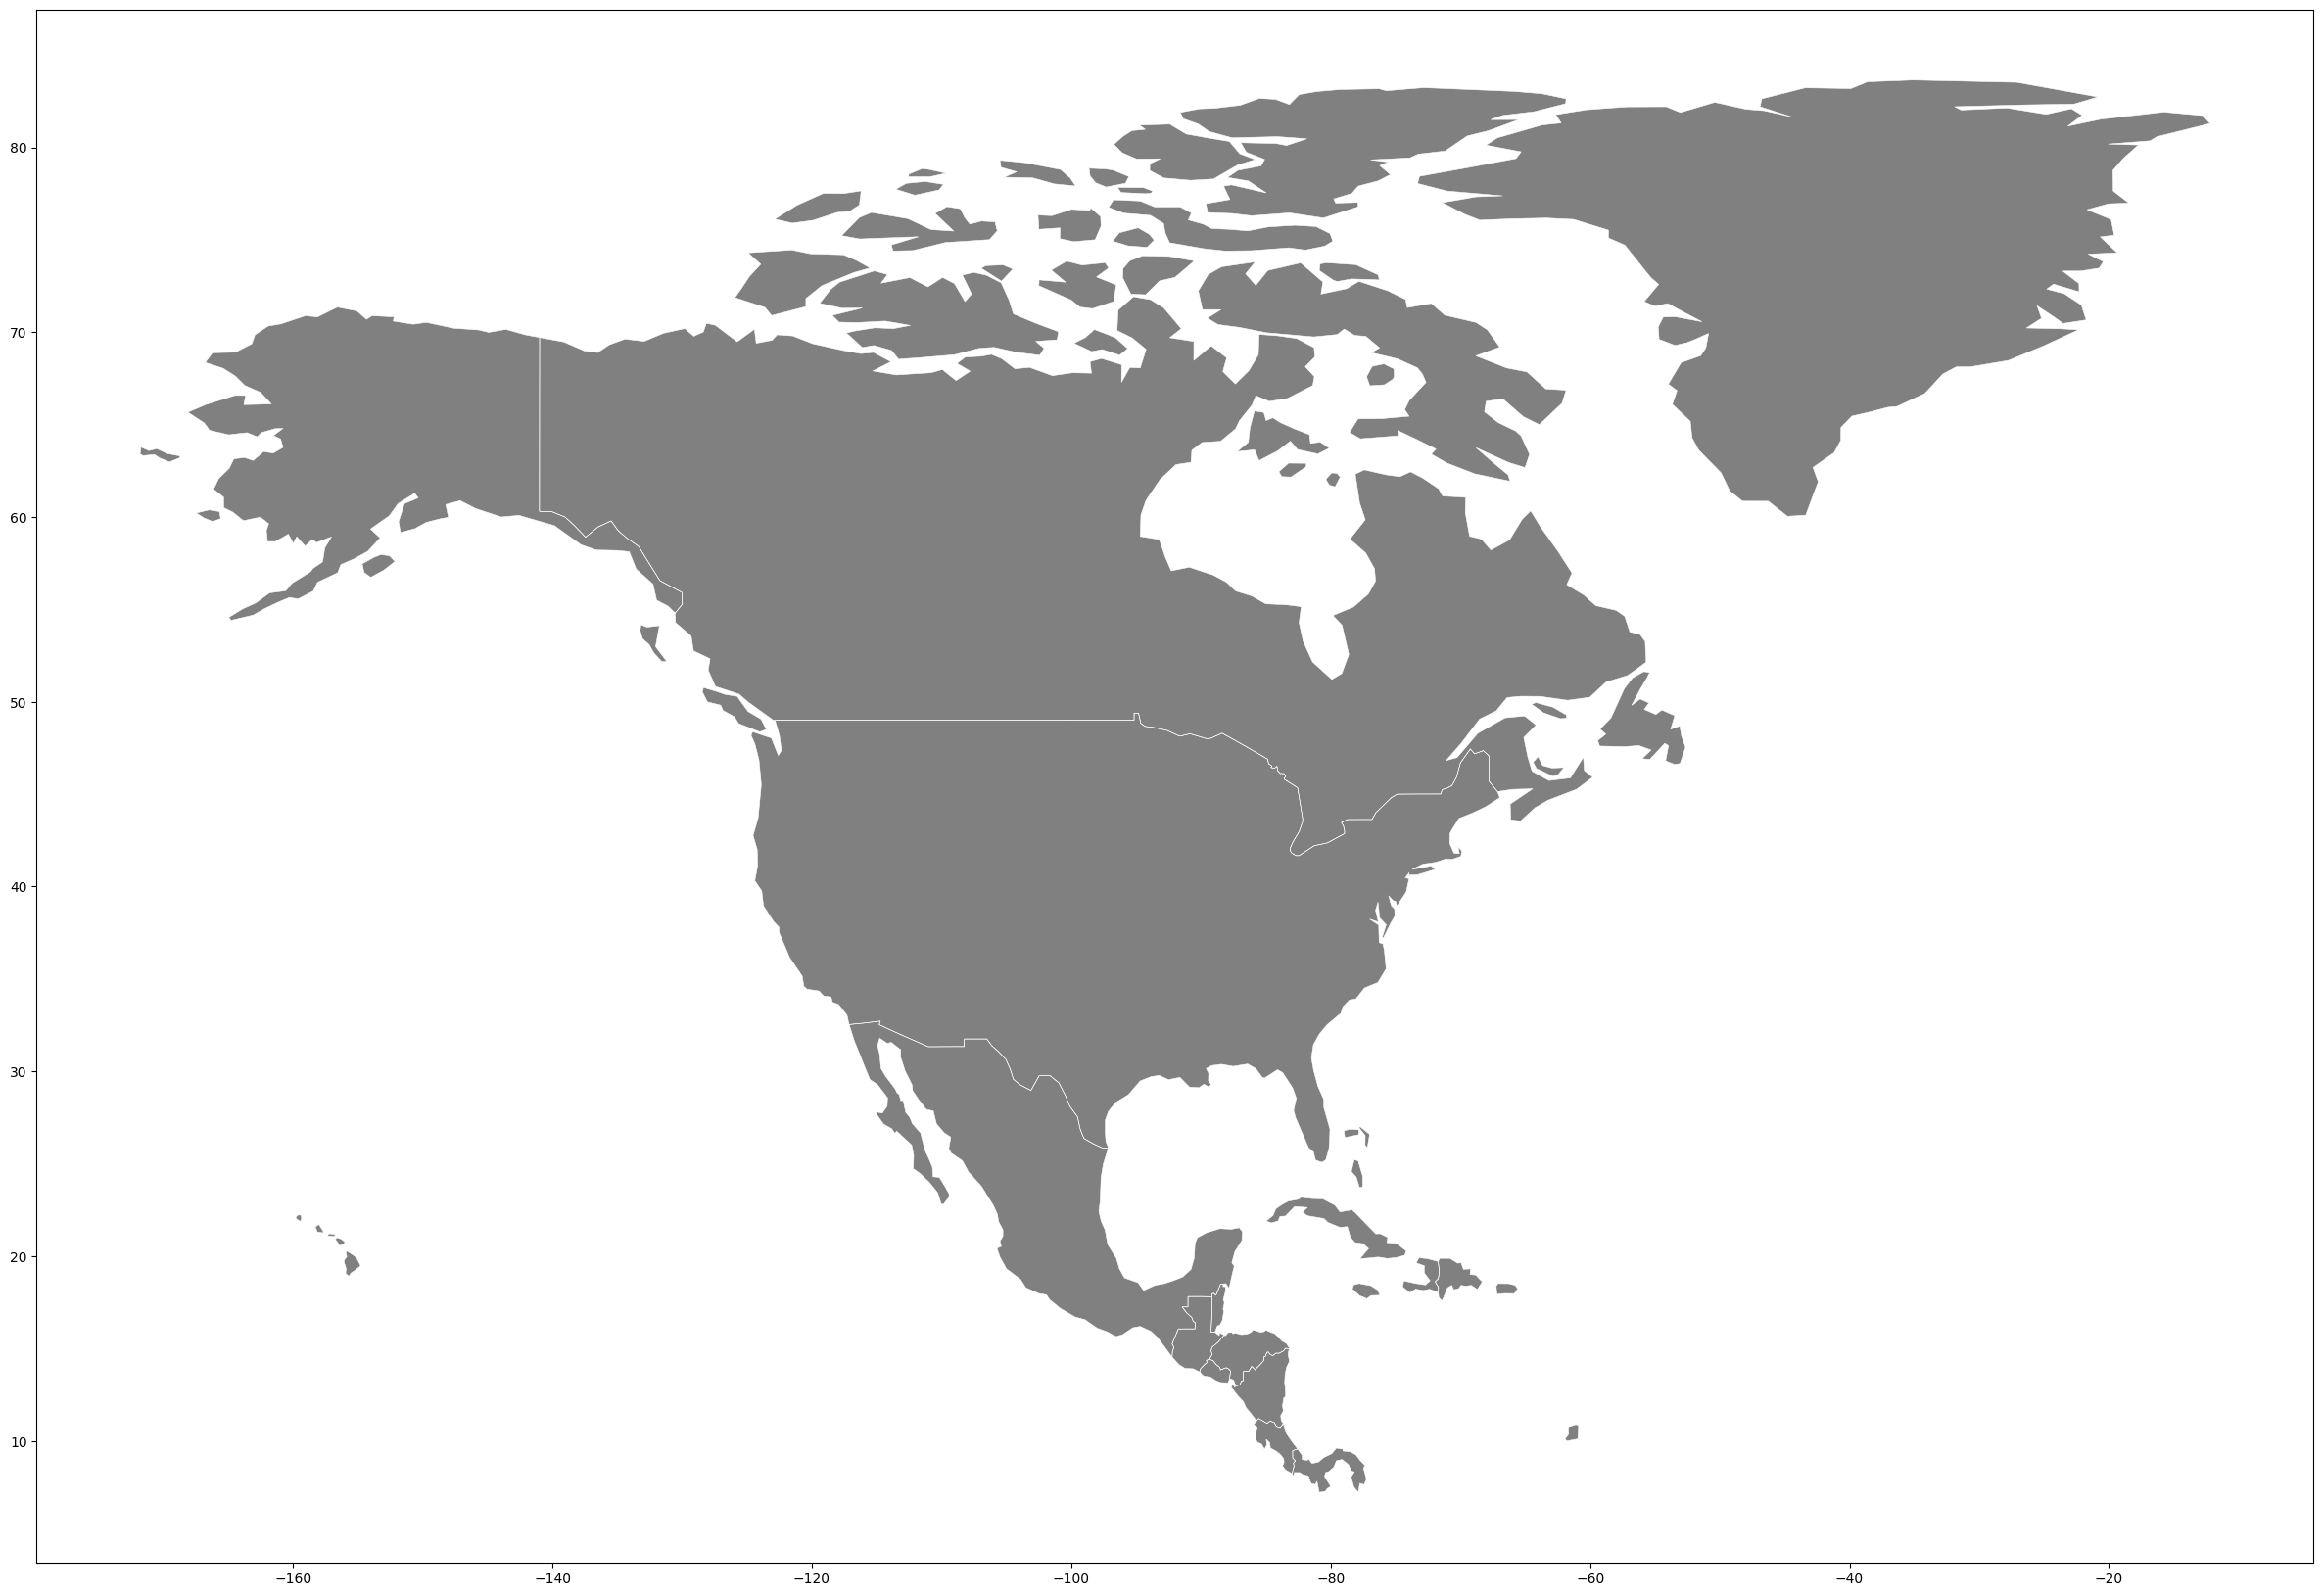

In [85]:
# Leer el archivo del mapa base (baja resolución) desde el conjunto de datos de GeoPandas
world_b = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtrar los datos para solo incluir América del Norte
north_america = world_b[world_b['continent'] == 'North America']

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(figsize=(30, 30))

# Plotea el mapa base de América del Norte
north_america.plot(ax=ax, color='grey')

# Plotea las líneas de las fronteras del mundo en América del Norte
north_america.boundary.plot(ax=ax, color='white', linewidth=0.4)

# Mostrar el mapa
plt.show()

<ipython-input-87-3eca89f97f16>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_c = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


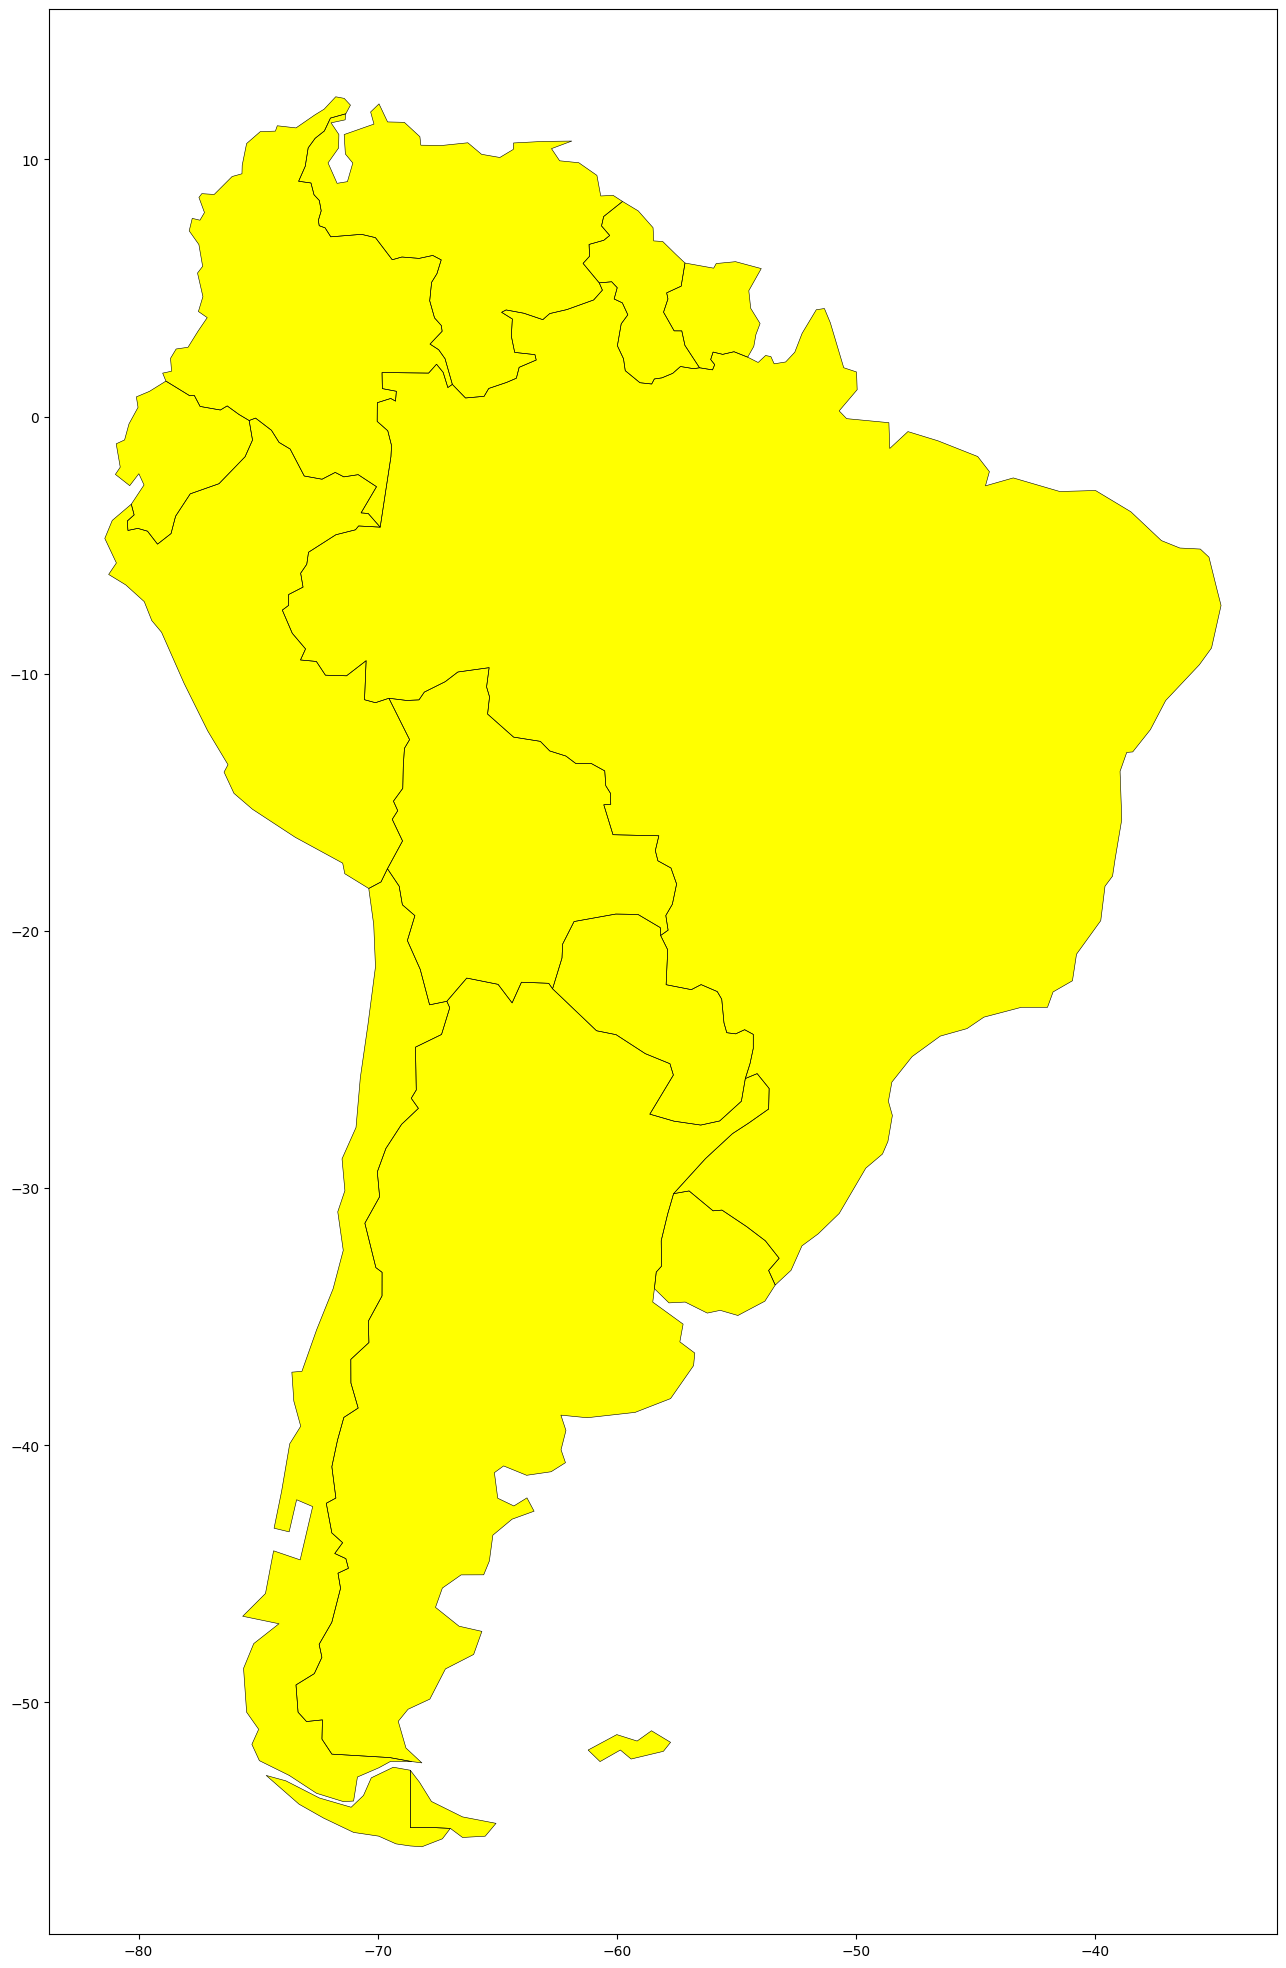

In [87]:
# Grafiquen "South America"

# Leer el archivo del mapa base (baja resolución) desde el conjunto de datos de GeoPandas
world_c = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtrar los datos para solo incluir América del Sur
south_america = world_b[world_b['continent'] == 'South America']

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(figsize=(25, 25))

# Plotea el mapa base de América del Norte
south_america.plot(ax=ax, color='yellow')

# Plotea las líneas de las fronteras del mundo en América del Norte
south_america.boundary.plot(ax=ax, color='black', linewidth=0.4)

# Mostrar el mapa
plt.show()




In [89]:
# Crear un DataFrame con la información deseada
data = {
    'lugar': ['Río de Janeiro', 'Santiago de Chile', 'Cuzco', 'Madrid'],
    'año': [2020, 2021, 2022, 2023],
    'latitud': [-22.9068, -33.4489, -13.522222, 40.4168],
    'longitud': [-43.1729, -70.6483, -71.983333, -3.7038],}

# Convertir el diccionario a DataFrame
viajes = pd.DataFrame(data)

# Mostrar el DataFrame resultante
viajes

,lugar,año,latitud,longitud
0,Río de Janeiro,2020,-22.906800,-43.172900
1,Santiago de Chile,2021,-33.448900,-70.648300
2,Cuzco,2022,-13.522222,-71.983333
3,Madrid,2023,40.416800,-3.703800


<ipython-input-90-49cc7b82d66c>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_datos = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


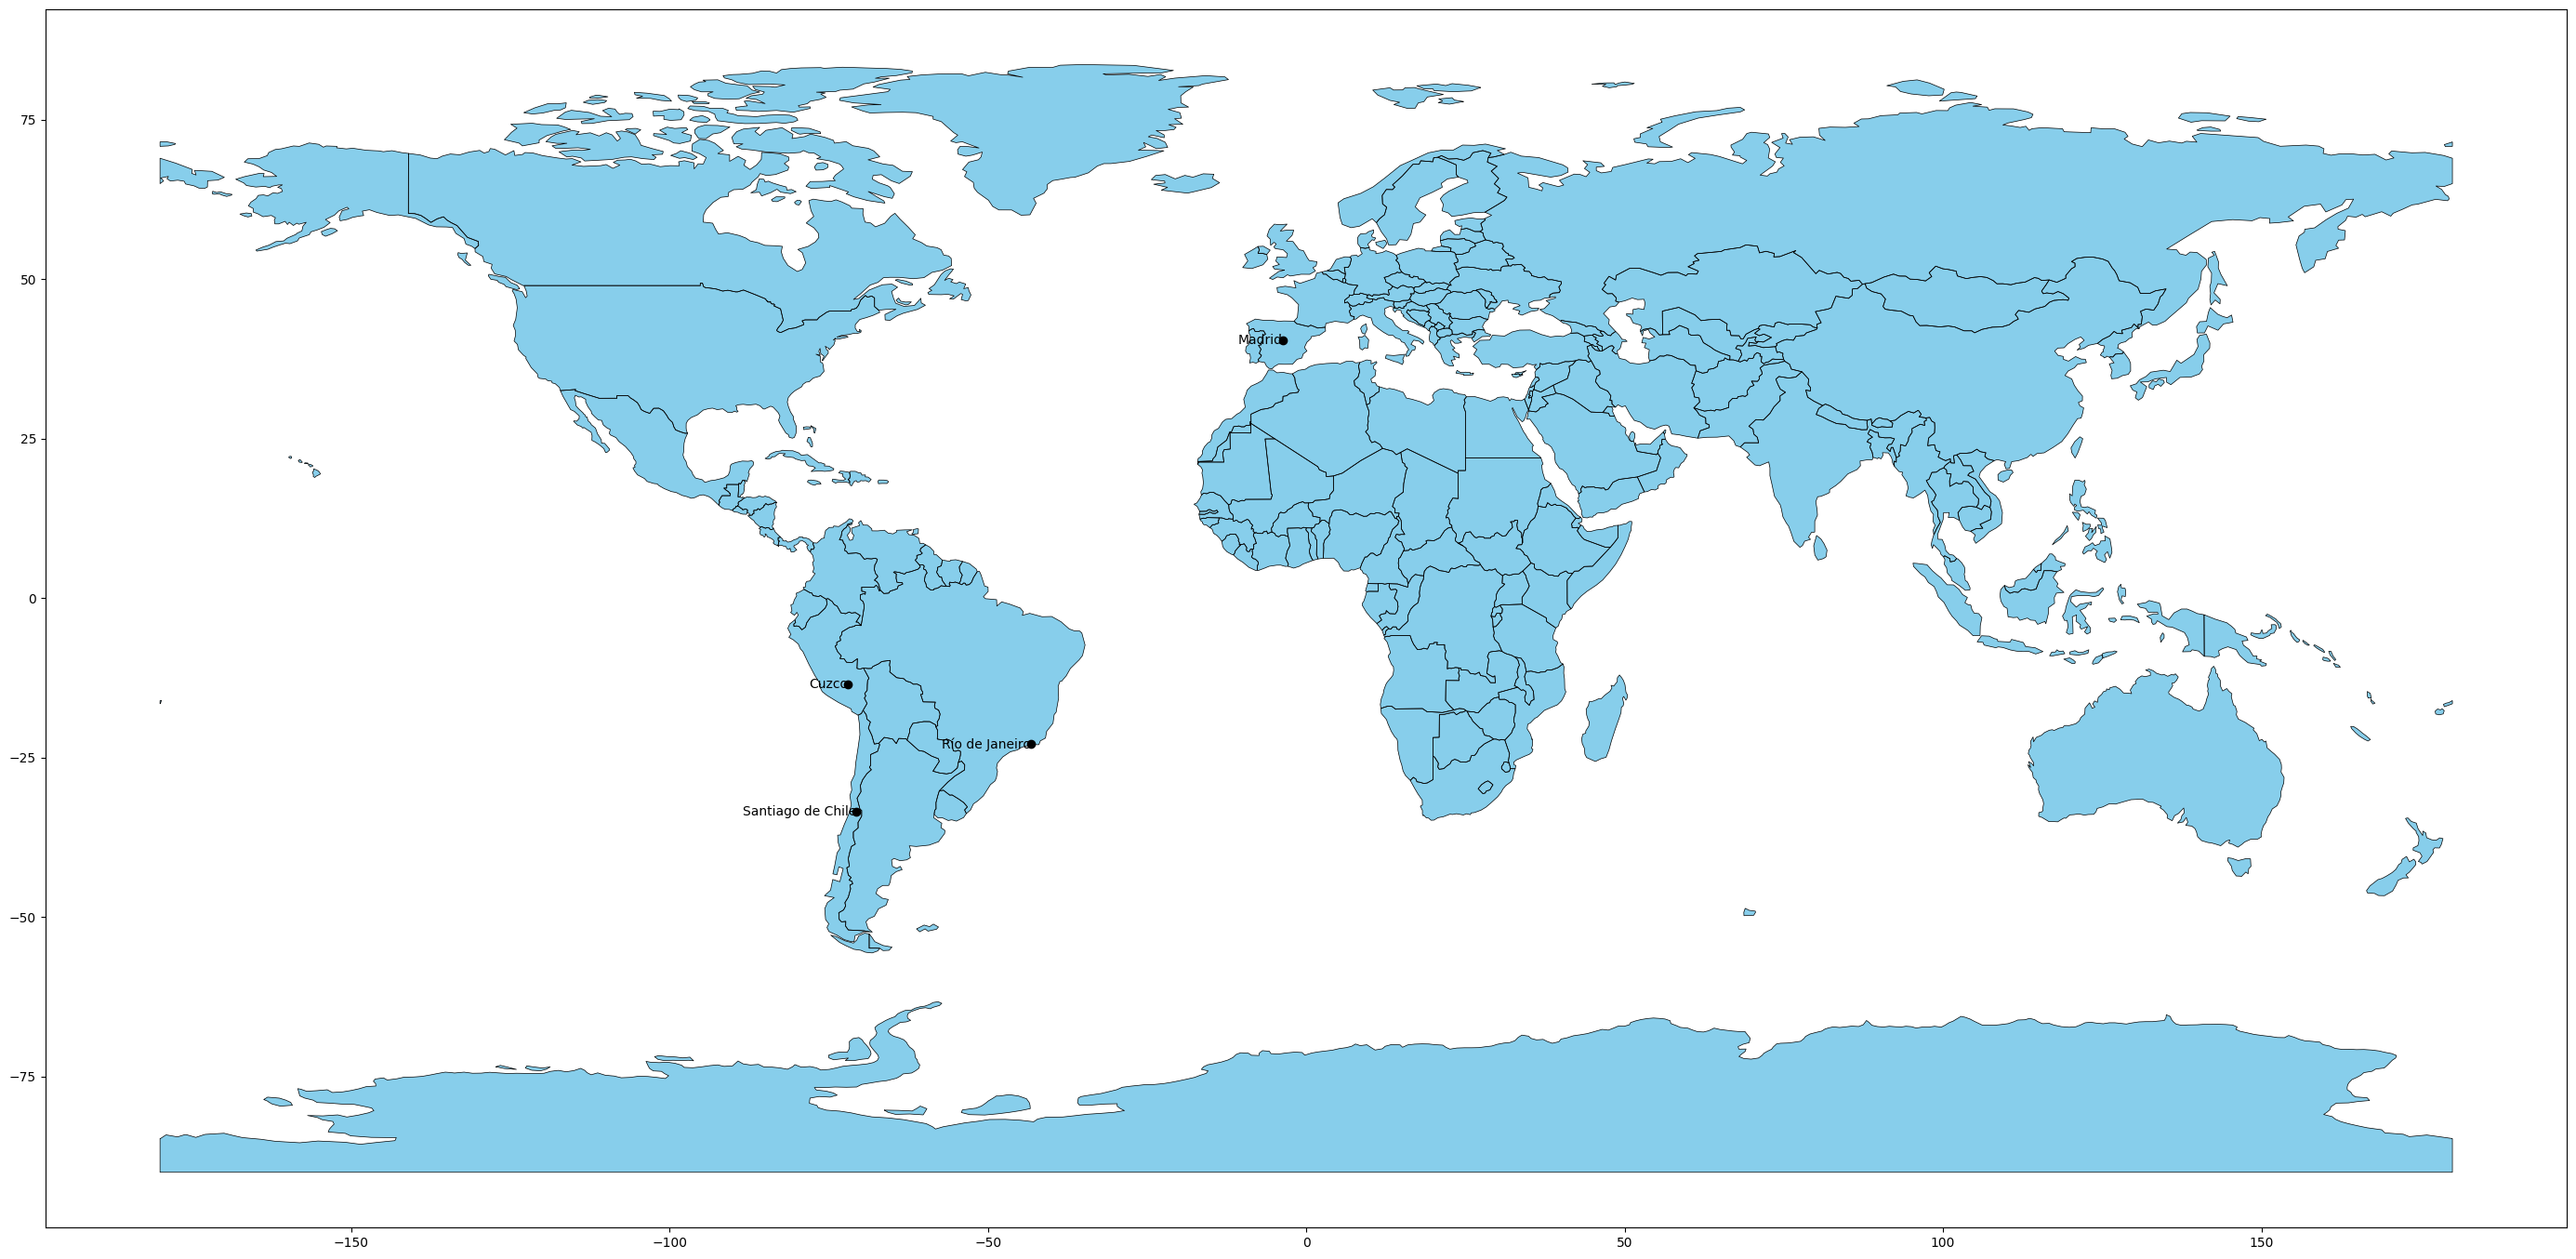

In [90]:
# Leer el archivo del mapa base (baja resolución) desde el conjunto de datos de GeoPandas
world_datos = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(figsize=(35, 30))

# Plotea el mapa base
world_datos.plot(ax=ax, color='skyblue')

# Plotea las líneas de las fronteras del mundo
world_datos.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Graficar los puntos y etiquetar los lugares
for i, row in viajes.iterrows():
    ax.scatter(row['longitud'], row['latitud'], color='black', zorder=4)  # zorder para que los puntos estén encima del mapa base
    ax.text(row['longitud'], row['latitud'], row['lugar'], fontsize=10, color='black', ha='right', va='center')  # Etiquetar los lugares

# Mostrar el mapa
plt.show()